In [1]:
%matplotlib widget
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

In [3]:
# Mass:
m1, m2 = 0.2, 0.8
mass_sum = m1 + m2
black_hole_mass = [m1, m2]

# Radius:
radius = 2
# r1, r2 = radius*0.5, radius*0.5

# Eccentricity:
e = 0.0

# Time range:
t0, tf = 0, 100
tl = tf*10

# 3D Rotation:
angles = [np.pi/6, np.pi/4, np.pi/6]  # omega, I, Omega

In [4]:
# Galaxical Potential:
def potential(constant_c, comp_vector, r):
    c_term = (constant_c*comp_vector) / r
    first_term = 1/(r + r**3)
    second_term = np.arctan(r)/(r**2)
    V = c_term*(first_term - second_term)
    return V

In [5]:
# c:
c = (2/np.pi)*(100*m1)

In [6]:
U = (0.5**3) + c*(np.arctan(radius*0.5)/(radius*0.5)) 

# E total c:
egy_total_c = 2*U

In [7]:
# A:
A1 = 2

# E total:
egy_total_1 = -egy_total_c/A1
print(np.round(egy_total_1, 4))

-10.125


In [8]:
# A:
A2 = 18

# E total:
egy_total_2 = -egy_total_c/A2
print(np.round(egy_total_2, 4))

-1.125


In [9]:
# E1, E2:
egy1_1 = egy_total_1*0.5
egy1_2 = egy_total_1*0.5

E1_contro_p1 = egy1_1
E1_contro_p2 = egy1_2

# print(E1_contro_p1)

In [10]:
# E1, E2:
egy2_1 = egy_total_2*0.5
egy2_2 = egy_total_2*0.5

E2_contro_p1 = egy2_1
E2_contro_p2 = egy2_2

# print(E2_contro_p1)

In [11]:
case_1 = SMBBH_NU(black_hole_mass,
                  t0=t0,
                  tf=tf,
                  tl=tl, 
                  constant_c=c,
                  radius=radius,
                  eccentricity=e,
                  angles=angles,
                  potential_function=potential)

In [12]:
case_2 = SMBBH_NU(black_hole_mass,
                  t0=t0,
                  tf=tf,
                  tl=tl, 
                  constant_c=c,
                  radius=radius,
                  eccentricity=e,
                  angles=angles,
                  potential_function=potential)

## Initial Velocity

In [13]:
# original initial velocity:
vo1_0 = case_1.v1_0
vo2_0 = case_1.v2_0

# p1_v0 = vo1_0 + E_contro_p1 
# p2_v0 = vo2_0 + E_contro_p2
p1_v0 = np.array([0.0, np.sqrt(-E1_contro_p1), 0.0]) 
p2_v0 = np.array([0.0, - np.sqrt(-E1_contro_p2), 0.0]) 


# Set new initial velocity:
case_1.initial_value = np.hstack((case_1.r1_0, case_1.r2_0, 
                                  p1_v0 , p2_v0))

# print(np.round(case_1.initial_value**2, 4))
print(np.round(case_1.initial_value**2, 4))

[1.     0.     0.     1.     0.     0.     0.     5.0625 0.     0.
 5.0625 0.    ]


In [14]:
# original initial velocity:
vo1_0 = case_2.v1_0
vo2_0 = case_2.v2_0

# p1_v0 = vo1_0 + E_contro_p1 
# p2_v0 = vo2_0 + E_contro_p2
p1_v0 = np.array([0.0, np.sqrt(-E2_contro_p1), 0.0]) 
p2_v0 = np.array([0.0, -np.sqrt(-E2_contro_p2), 0.0]) 
 

# Set new initial velocity:
case_2.initial_value = np.hstack((case_2.r1_0, case_2.r2_0, 
                                  p1_v0 , p2_v0))

print(np.round(case_2.initial_value**2, 4))

[1.     0.     0.     1.     0.     0.     0.     0.5625 0.     0.
 0.5625 0.    ]


## Model r12

In [15]:
case_1_dict = case_1.run()
case_2_dict = case_2.run()

In [16]:
mA1_r1 = case_1_dict['rot_data']['p1_orbit']
mA1_r2 = case_1_dict['rot_data']['p2_orbit']

In [17]:
mA2_r1 = case_2_dict['rot_data']['p1_orbit']
mA2_r2 = case_2_dict['rot_data']['p2_orbit']

In [18]:
mA1_r12_x = mA1_r2[:, 0] - mA1_r1[:, 0]
mA1_r12_y = mA1_r2[:, 1] - mA1_r1[:, 1]
mA1_r12_z = mA1_r2[:, 2] - mA1_r1[:, 2]
mA1_r12_len = np.sqrt(mA1_r12_x**2 + mA1_r12_y**2 + mA1_r12_z**2)

In [19]:
mA2_r12_x = mA2_r2[:, 0] - mA2_r1[:, 0]
mA2_r12_y = mA2_r2[:, 1] - mA2_r1[:, 1]
mA2_r12_z = mA2_r2[:, 2] - mA2_r1[:, 2]
mA2_r12_len = np.sqrt(mA2_r12_x**2 + mA2_r12_y**2 + mA2_r12_z**2)

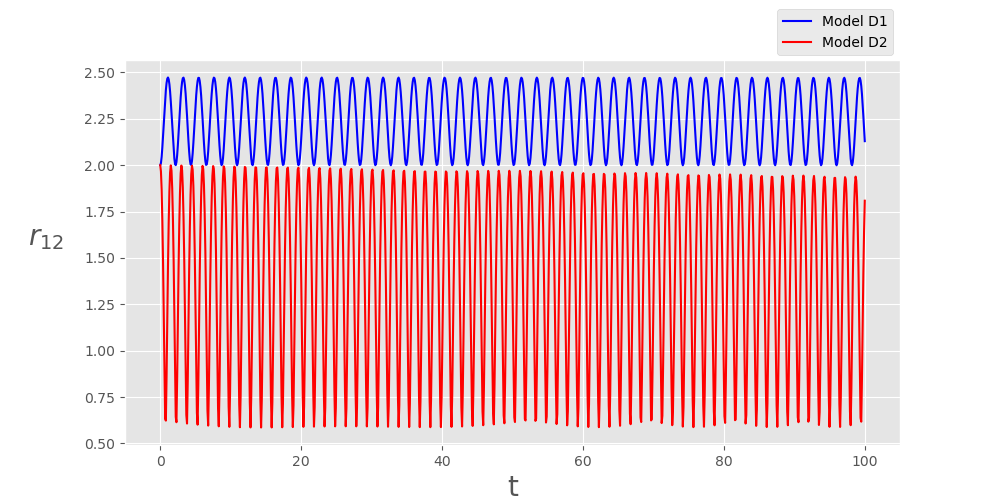

In [20]:
time_length = np.linspace(t0, tf, tl)
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.subplot()
plt.plot(time_length, mA1_r12_len, color='blue', label="Model D1")
plt.plot(time_length, mA2_r12_len, color='red', label="Model D2")
plt.xlabel("t", fontsize=20)
plt.ylabel(r"$r_{12}$        ", fontsize=20, rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.15))
plt.show()